# Perhitungan Skor RNN-IDS

## Import All Necessary Libraries

In [25]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import math

## Load All the Data

In [26]:
df_pred = pd.read_csv('./result-bi-lstm-tcp80-hl2-seq5-do0.2-oov1500-combined-00080.pcap.csv', names=['id', 'binary_error', 'b_mean', 'b_iqr', 'b_zscore', 'floatin_error', 'f_mean', 'f_iqr', 'f_zscore'])
df_truth = pd.read_csv('../NUSW-NB15_GT.csv')

In [27]:
df_pred.head()

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore
0,175.45.176.1-4657-149.171.126.18-80-tcp,0.088235,0,1,1,74727.793970,1,1,1
1,175.45.176.3-32473-149.171.126.18-80-tcp,0.043956,0,1,1,31117.500000,0,1,1
2,175.45.176.0-21873-149.171.126.14-80-tcp,0.027933,0,0,0,14473.883853,0,0,0
3,175.45.176.0-49194-149.171.126.17-80-tcp,0.064865,0,1,1,55804.144444,1,1,1
4,175.45.176.1-51435-149.171.126.14-80-tcp,0.057471,0,1,1,48791.337278,1,1,1


In [28]:
df_truth.head()

,Start time,Last time,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.
0,1421927414,1421927416,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,.
1,1421927415,1421927415,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.
2,1421927416,1421927416,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.
3,1421927417,1421927417,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.
4,1421927418,1421927418,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.


## Exploratory Data Analysis

In [29]:
df_pred[['b_iqr']].value_counts()

b_iqr
0        123918
1         30414
Name: count, dtype: int64

In [30]:
df_pred[['b_zscore']].value_counts()

b_zscore
0           136629
1            17703
Name: count, dtype: int64

In [31]:
df_truth.isnull().sum()

Start time                0
Last time                 0
Attack category           0
Attack subcategory     4097
Protocol                  0
Source IP                 0
Source Port               0
Destination IP            0
Destination Port          0
Attack Name               1
Attack Reference      50638
.                         0
dtype: int64

## Data Pre-Processing

### Convert the type of the data

In [32]:
df_truth['Source Port'] = df_truth['Source Port'].astype(int)
df_truth['Destination Port'] =df_truth['Destination Port'].astype(int)
df_truth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174347 entries, 0 to 174346
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Start time          174347 non-null  int64 
 1   Last time           174347 non-null  int64 
 2   Attack category     174347 non-null  object
 3   Attack subcategory  170250 non-null  object
 4   Protocol            174347 non-null  object
 5   Source IP           174347 non-null  object
 6   Source Port         174347 non-null  int64 
 7   Destination IP      174347 non-null  object
 8   Destination Port    174347 non-null  int64 
 9   Attack Name         174346 non-null  object
 10  Attack Reference    123709 non-null  object
 11  .                   174347 non-null  object
dtypes: int64(4), object(8)
memory usage: 16.0+ MB


In [33]:
df_truth['Source Port'] = df_truth['Source Port'].astype(str)
df_truth['Destination Port'] =df_truth['Destination Port'].astype(str)
df_truth['id'] = df_truth[['Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol']].apply("-".join, axis=1)

## Making Predictions

In [34]:
df_pred["predicted"] = np.where(df_pred["id"].isin(df_truth["id"]), 1, 0)

In [35]:
df_pred[df_pred['predicted']==1]

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,predicted
11,175.45.176.0-7302-149.171.126.18-80-tcp,0.040161,0,1,0,20939.676230,0,0,0,1
44,175.45.176.1-20527-149.171.126.19-80-tcp,0.056872,0,1,1,40714.941748,1,1,1,1
45,175.45.176.2-2965-149.171.126.13-80-tcp,0.054348,0,1,1,27693.234637,0,1,1,1
46,175.45.176.0-25947-149.171.126.14-80-tcp,0.068323,0,1,1,58074.775641,1,1,1,1
47,175.45.176.1-50733-149.171.126.15-80-tcp,0.040909,0,1,0,15400.000000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
152652,175.45.176.0-52149-149.171.126.10-80-tcp,0.064327,0,1,1,60506.126506,1,1,1,1
152661,175.45.176.0-18979-149.171.126.12-80-tcp,0.004297,0,1,0,763.404455,0,0,0,1
152671,175.45.176.0-33654-149.171.126.12-80-tcp,0.004297,0,1,0,763.404455,0,0,0,1
153419,175.45.176.3-65382-149.171.126.11-80-tcp,0.063613,0,1,1,47436.061856,1,1,1,1


In [36]:
df_pred[df_pred['predicted']==0]

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,predicted
0,175.45.176.1-4657-149.171.126.18-80-tcp,0.088235,0,1,1,74727.793970,1,1,1,0
1,175.45.176.3-32473-149.171.126.18-80-tcp,0.043956,0,1,1,31117.500000,0,1,1,0
2,175.45.176.0-21873-149.171.126.14-80-tcp,0.027933,0,0,0,14473.883853,0,0,0,0
3,175.45.176.0-49194-149.171.126.17-80-tcp,0.064865,0,1,1,55804.144444,1,1,1,0
4,175.45.176.1-51435-149.171.126.14-80-tcp,0.057471,0,1,1,48791.337278,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
154327,149.171.126.15-80-175.45.176.2-20096-tcp,0.000000,0,1,0,0.000000,0,0,0,0
154328,59.166.0.7-25671-149.171.126.9-80-tcp,0.012876,0,0,0,5824.127193,0,0,0,0
154329,59.166.0.6-24097-149.171.126.7-80-tcp,0.021834,0,0,0,6391.879464,0,0,0,0
154330,59.166.0.6-22144-149.171.126.3-80-tcp,0.021834,0,0,0,7079.312500,0,0,0,0


In [37]:
df_pred

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,predicted
0,175.45.176.1-4657-149.171.126.18-80-tcp,0.088235,0,1,1,74727.793970,1,1,1,0
1,175.45.176.3-32473-149.171.126.18-80-tcp,0.043956,0,1,1,31117.500000,0,1,1,0
2,175.45.176.0-21873-149.171.126.14-80-tcp,0.027933,0,0,0,14473.883853,0,0,0,0
3,175.45.176.0-49194-149.171.126.17-80-tcp,0.064865,0,1,1,55804.144444,1,1,1,0
4,175.45.176.1-51435-149.171.126.14-80-tcp,0.057471,0,1,1,48791.337278,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
154327,149.171.126.15-80-175.45.176.2-20096-tcp,0.000000,0,1,0,0.000000,0,0,0,0
154328,59.166.0.7-25671-149.171.126.9-80-tcp,0.012876,0,0,0,5824.127193,0,0,0,0
154329,59.166.0.6-24097-149.171.126.7-80-tcp,0.021834,0,0,0,6391.879464,0,0,0,0
154330,59.166.0.6-22144-149.171.126.3-80-tcp,0.021834,0,0,0,7079.312500,0,0,0,0


In [38]:
df_pred[['predicted']].value_counts()

predicted
0            138227
1             16105
Name: count, dtype: int64

In [39]:
df_temp = df_pred[['id', 'b_mean','b_iqr', 'b_zscore', 'f_zscore', 'f_mean','f_iqr' ]]
df_temp.to_csv('../mcnemar/http/bi-lstm_pred_0.005.csv')

## Calculating Score

In [40]:
threshold = ['b_mean', 'b_iqr', 'b_zscore']
threshold_2 = ['f_mean', 'f_iqr', 'f_zscore']

methods = ['binary', 'floating']

In [41]:
df_pred[['b_zscore']]

,b_zscore
0,1
1,1
2,0
3,1
4,1
...,...
154327,0
154328,0
154329,0
154330,0


### Detection Rate

In [42]:
from sklearn.metrics import recall_score

score = dict()
score['Detection Rate'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            acc = recall_score(df_pred['predicted'], df_pred[i])
            score['Detection Rate'][i] = acc
            print(f'Recall-Binary-{i}: {acc}')
    else:
        for i in threshold_2:
            acc = recall_score(df_pred['predicted'], df_pred[i])
            score['Detection Rate'][i] = acc
            print(f'Recall-Floating-{i}: {acc}')  

Recall-Binary-b_mean: 0.10692331574045327
Recall-Binary-b_iqr: 0.8968022353306426
Recall-Binary-b_zscore: 0.8099348028562559
Recall-Floating-f_mean: 0.4900341508848184
Recall-Floating-f_iqr: 0.7487736727724309
Recall-Floating-f_zscore: 0.6604160198696057


In [43]:
from sklearn.metrics import accuracy_score

score['Accuracy Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            acc = accuracy_score(df_pred['predicted'], df_pred[i])
            score['Accuracy Score'][i] = acc
            print(f'Accuracy-Binary-{i}: {acc}')
    else:
        for i in threshold_2:
            acc = accuracy_score(df_pred['predicted'], df_pred[i])
            score['Accuracy Score'][i] = acc
            print(f'Accuracy-Floating-{i}: {acc}')  

Accuracy-Binary-b_mean: 0.9010898582277169
Accuracy-Binary-b_iqr: 0.8857463131430942
Accuracy-Binary-b_zscore: 0.9499779695720914
Accuracy-Floating-f_mean: 0.9225306482129435
Accuracy-Floating-f_iqr: 0.9404984060337455
Accuracy-Floating-f_zscore: 0.9373817484384315


### Confussion Matrix

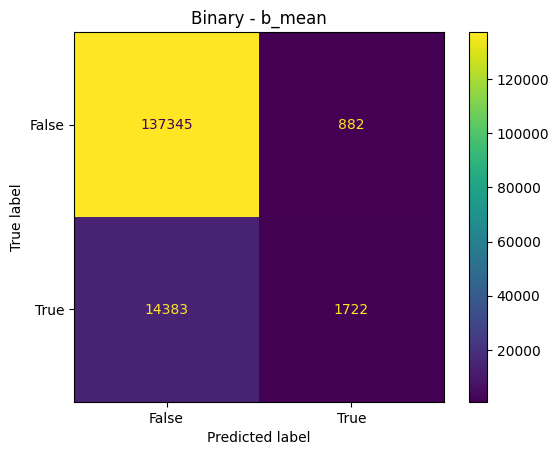

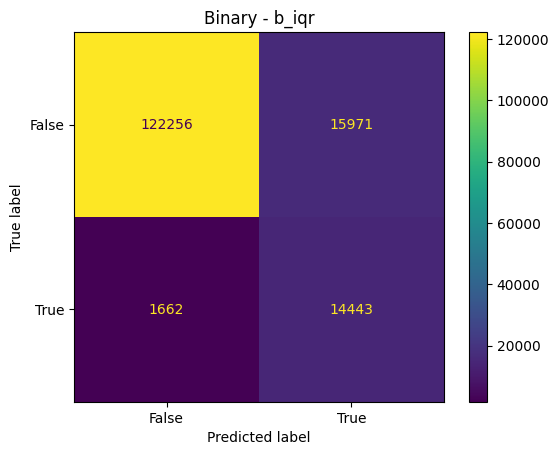

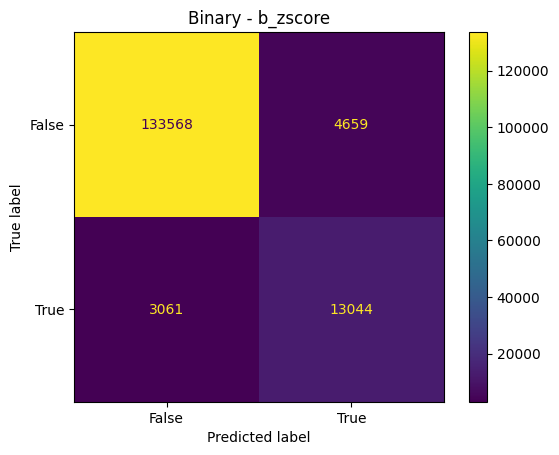

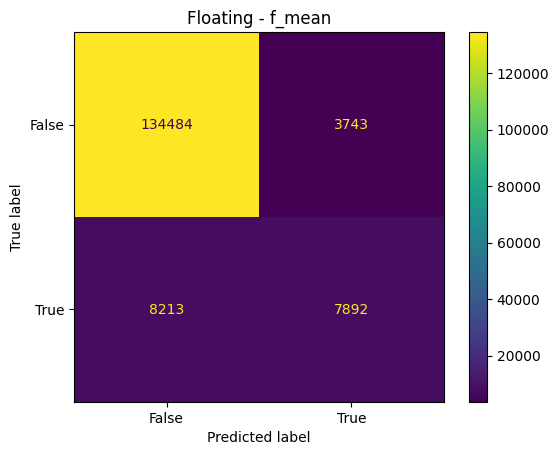

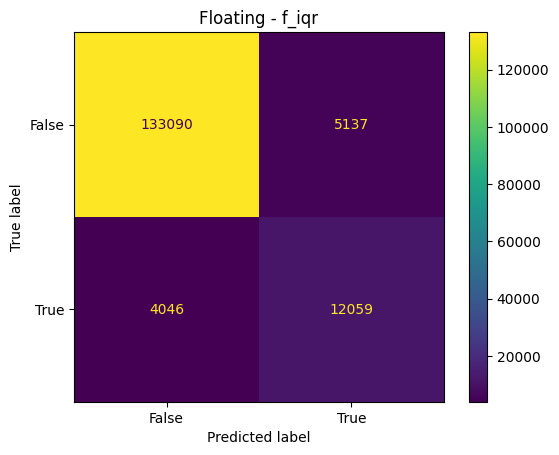

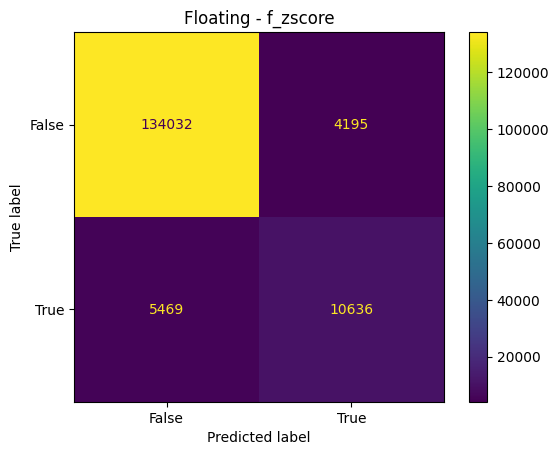

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

for method in methods:
    if method == 'binary':
        for i in threshold:
            conf_matrix = confusion_matrix(df_pred['predicted'], df_pred[i])
            cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
            cm_display.plot()
            plt.title(f'Binary - {i.strip()}')
            plt.show()
    else:
        for i in threshold_2:
            conf_matrix = confusion_matrix(df_pred['predicted'], df_pred[i])
            cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
            cm_display.plot()
            plt.title(f'Floating - {i.strip()}')
            plt.show()


### F2-Score

In [45]:
score['F2 Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            tn, fp, fn, tp = confusion_matrix(df_pred['predicted'], df_pred[i]).ravel()
            f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
            score['F2 Score'][i] = f2
            print(f'F2-Binary-{i}: {f2}')
    else:
        for i in threshold_2:
            tn, fp, fn, tp = confusion_matrix(df_pred['predicted'], df_pred[i]).ravel()
            f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
            score['F2 Score'][i] = f2
            print(f'F2-Floating-{i}: {f2}')

F2-Binary-b_mean: 0.12846144664597756
F2-Binary-b_iqr: 0.7614884956872008
F2-Binary-b_zscore: 0.7941745917708802
F2-Floating-f_mean: 0.5188350535796463
F2-Floating-f_iqr: 0.7387644579494217
F2-Floating-f_zscore: 0.671032542176124


### FPR Score

In [46]:
score['FPR Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            tn, fp, fn, tp = confusion_matrix(df_pred['predicted'], df_pred[i]).ravel()
            fpr = fp/(fp+tn)
            score['FPR Score'][i] = fpr
            print(f'FPR-Binary-{i}: {fpr}')
    else:
        for i in threshold_2:
            tn, fp, fn, tp = confusion_matrix(df_pred['predicted'], df_pred[i]).ravel()
            fpr = fp/(fp+tn)
            score['FPR Score'][i] = fpr
            print(f'FPR-Floating-{i}: {fpr}')

FPR-Binary-b_mean: 0.006380808380417719
FPR-Binary-b_iqr: 0.11554182612658888
FPR-Binary-b_zscore: 0.033705426580914
FPR-Floating-f_mean: 0.027078645995355467
FPR-Floating-f_iqr: 0.037163506406129046
FPR-Floating-f_zscore: 0.030348629428404002


In [47]:
df_score = pd.DataFrame.from_dict(score)
df_score

,Detection Rate,Accuracy Score,F2 Score,FPR Score
b_mean,0.106923,0.901090,0.128461,0.006381
b_iqr,0.896802,0.885746,0.761488,0.115542
b_zscore,0.809935,0.949978,0.794175,0.033705
f_mean,0.490034,0.922531,0.518835,0.027079
f_iqr,0.748774,0.940498,0.738764,0.037164
f_zscore,0.660416,0.937382,0.671033,0.030349


In [48]:
df_score.to_excel('score_bi-lstm_http_0.005.xlsx')